# Employee Exit Surveys Analysis

In this project, we analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Our goal is to explore whether employees who resigned after a short tenure or at different age groups did so due to dissatisfaction. 

In [79]:
import pandas as pd
import numpy as np

In [80]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [81]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [82]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [83]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [84]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [85]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [86]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Dataset Overview and Initial Observations

We have two datasets: **DETE exit survey** (822 entries, 56 columns) and **TAFE exit survey** (702 entries, 72 columns). Both datasets contain information about employees who resigned, including reasons for leaving, job satisfaction, and demographic details.  

### Key Observations:
- The **DETE dataset** includes columns related to dissatisfaction factors, employment conditions, and tenure details, but has many missing values in non-mandatory responses.
- The **TAFE dataset** has a more detailed breakdown of contributing factors for resignation but includes many survey responses stored as text, requiring standardization.
- Both datasets contain categorical variables, which will require cleaning and transformation before analysis.


## Handling Missing Values and Removing Unnecessary Columns

To prepare the datasets for analysis, we'll first handle missing values by specifying values that should be treated as `NaN` when loading the data. This ensures consistency in handling null values across both datasets.  

Next, we'll drop columns that are irrelevant to our analysis, such as those with excessive missing values or information that does not contribute to answering our research questions. This step helps streamline our dataset and improves efficiency in further processing.


In [87]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [88]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [89]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Dropping Irrelevant Columns  

To focus on our analysis, we've removed columns that are not relevant to our research questions. These include fields that contain excessive missing values, redundant information, or data unrelated to employee resignations and dissatisfaction. By keeping only essential columns, we ensure a cleaner and more manageable dataset for further analysis.  


## Standardizing Column Names  

The two datasets contain columns that serve the same purpose but have different names. To prepare for merging, we need to rename these columns to ensure consistency. This step will make it easier to analyze employee resignation patterns across both datasets.  


In [90]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('\s+', ' ', regex=True).str.strip().str.lower()

In [91]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [92]:
updated_column_names = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

In [93]:
tafe_survey_updated.rename(columns=updated_column_names, inplace=True)

In [94]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [95]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [96]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [97]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [98]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [99]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate']) ].copy()

In [100]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [101]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [102]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filtering Resignations  

To focus on the project's objective, we need to analyze only the employees who resigned. In the `dete_survey_updated` dataframe, resignations are categorized into three types:  
- "Resignation-Other reasons"  
- "Resignation-Other employer"  
- "Resignation-Move overseas/interstate"  

In the `tafe_survey_updated` dataframe, resignations are recorded under a single category: "Resignation." We filter both datasets to retain only these records for further analysis.  

In [103]:
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [104]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:]

In [105]:
dete_resignations['cease_date'].value_counts()

cease_date
2013    146
2012    129
2014     22
2010      2
2006      1
Name: count, dtype: int64

In [106]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [107]:
dete_resignations['cease_date'].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [108]:
dete_resignations['dete_start_date'].value_counts().sort_values()

dete_start_date
1975.0     1
1984.0     1
1971.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
1982.0     1
1983.0     2
1974.0     2
1976.0     2
2001.0     3
1986.0     3
1985.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1980.0     5
1990.0     5
1997.0     5
1993.0     5
1992.0     6
2002.0     6
1998.0     6
1996.0     6
2003.0     6
1994.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: count, dtype: int64

In [109]:
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype(float)

In [110]:
tafe_resignations['cease_date'].value_counts().sort_values()

cease_date
2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: count, dtype: int64

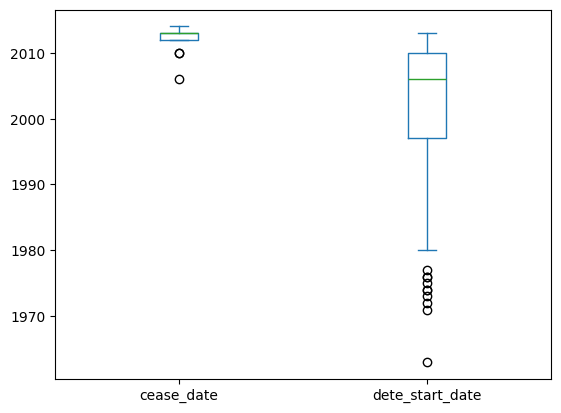

In [111]:
import matplotlib.pyplot as plt

dete_resignations[['cease_date', 'dete_start_date']].dropna().plot(kind='box')
plt.show()

## Cleaning and Converting Date Columns  

We extracted only the year from the `cease_date` column in the `dete_resignations` dataframe and converted it to a float type for consistency.  

Both `dete_resignations` and `tafe_resignations` contain records of employee resignations over multiple years. Standardizing the date formats ensures that we can accurately compare trends across both datasets.  

Additionally, we examined the `dete_start_date` column to understand when employees began working at the organization. This will help in analyzing tenure and identifying patterns in resignations.  

In [112]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Creating a Common 'Institute Service' Column  

The `tafe_resignations` dataframe contains an `institute_service` column that represents the length of time an employee spent at the organization. However, the `dete_resignations` dataframe does not have a direct equivalent.  

To ensure consistency, we calculated the `institute_service` values for `dete_resignations` by subtracting the `dete_start_date` from the `cease_date`. We then stored these values under the same column name, `institute_service`, so that both datasets can be analyzed together seamlessly.  

## Identifying Employees Who Resigned Due to Dissatisfaction  

To analyze employee dissatisfaction, we identified key columns in both datasets that indicate whether dissatisfaction played a role in their resignation.  

### Columns Used for Identifying Dissatisfied Employees:  

- **tafe_survey_updated:**  
  - `Contributing Factors. Dissatisfaction`  
  - `Contributing Factors. Job Dissatisfaction`  

- **dete_survey_updated:**  
  - `job_dissatisfaction`  
  - `dissatisfaction_with_the_department`  
  - `physical_work_environment`  
  - `lack_of_recognition`  
  - `lack_of_job_security`  
  - `work_location`  
  - `employment_conditions`  
  - `work_life_balance`  
  - `workload`  

If an employee indicated dissatisfaction in any of these columns, we marked them as "dissatisfied" in a new column. This allows us to consistently compare dissatisfaction levels across both datasets.  

In [113]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [114]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

In [115]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [121]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].map(update_vals).any(axis=1)

In [124]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    249
True      91
Name: count, dtype: int64

In [129]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

In [130]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

In [131]:
tafe_resignations_up = tafe_resignations.copy()

In [132]:
dete_resignations_up = dete_resignations.copy()

In [133]:
dete_resignations_up['institute'] = 'DETE'

In [134]:
tafe_resignations_up['institute'] = 'TAFE'

In [137]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [138]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [140]:
combined_updated['institute_service'].value_counts(dropna=False)

institute_service
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
14.0                   6
22.0                   6
12.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
25.0                   2
36.0                   2
30.0                   2
26.0                   2
28.0   

## Categorizing Employees Based on Experience  

To analyze employee trends, we categorized the `institute_service` values into four experience levels:  

- **New:** Less than 3 years at the company  
- **Experienced:** 3-6 years at the company  
- **Established:** 7-10 years at the company  
- **Veteran:** 11 or more years at the company  

This categorization helps us understand how resignation patterns vary across different levels of experience.  

In [142]:
combined['institute_service_up'] = combined['institute_service'].astype('str').str.extract(r'(\d+)')

In [144]:
combined['institute_service_up'] = combined['institute_service_up'].astype('float')

In [145]:
combined['institute_service_up'].value_counts()

institute_service_up
1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
14.0      6
17.0      6
10.0      6
22.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
19.0      3
32.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
25.0      2
28.0      2
35.0      1
38.0      1
49.0      1
33.0      1
27.0      1
41.0      1
42.0      1
29.0      1
34.0      1
31.0      1
Name: count, dtype: int64

In [147]:
def year_2_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    else:
        return 'Veteran'

In [149]:
combined['service_cat'] = combined['institute_service_up'].apply(year_2_stage)

In [150]:
combined['service_cat'].value_counts()

service_cat
New            193
Experienced    172
Veteran        136
Established     62
Name: count, dtype: int64

## Initial Analysis of Employee Dissatisfaction  

To begin our analysis, we addressed missing values in the `dissatisfied` column. Employees were categorized as "dissatisfied" if they indicated dissatisfaction in at least one relevant column.  

Next, we aggregated the data to observe overall trends, but this is just an initial step. Additional missing values still need to be handled for a more complete analysis. Further steps will refine the dataset and enhance our insights.  

In [151]:
combined['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    411
True     240
Name: count, dtype: int64

In [154]:
dissatisfied_pct = combined.pivot_table(index='service_cat', values='dissatisfied')

<Axes: xlabel='service_cat'>

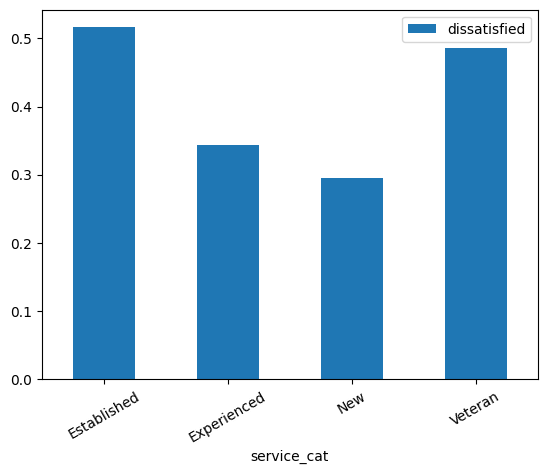

In [156]:
%matplotlib inline

dissatisfied_pct.plot(kind='bar', rot=30)

## Key Findings on Employee Dissatisfaction and Resignations  

Our analysis reveals that **Established (7-10 years)** and **Veteran (11+ years)** employees are more likely to resign due to dissatisfaction compared to other experience levels.  

This trend suggests that longer-tenured employees may face increasing challenges or frustrations in the workplace, leading to higher resignation rates. Further analysis could explore specific dissatisfaction factors contributing to these resignations.  